# 결정 트리(Decision Tree)

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [4]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

* 모델 시각화

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)

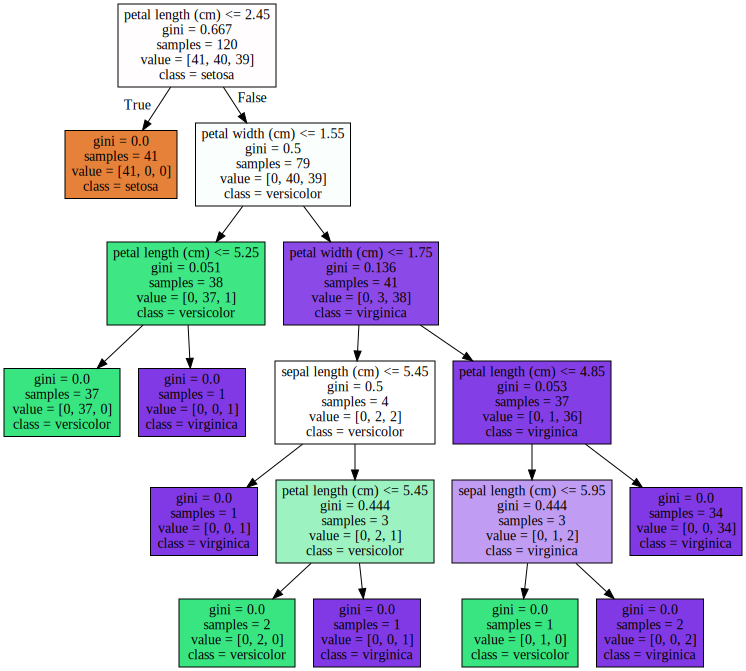

In [6]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 제약조건

- max_depth = 3

In [7]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

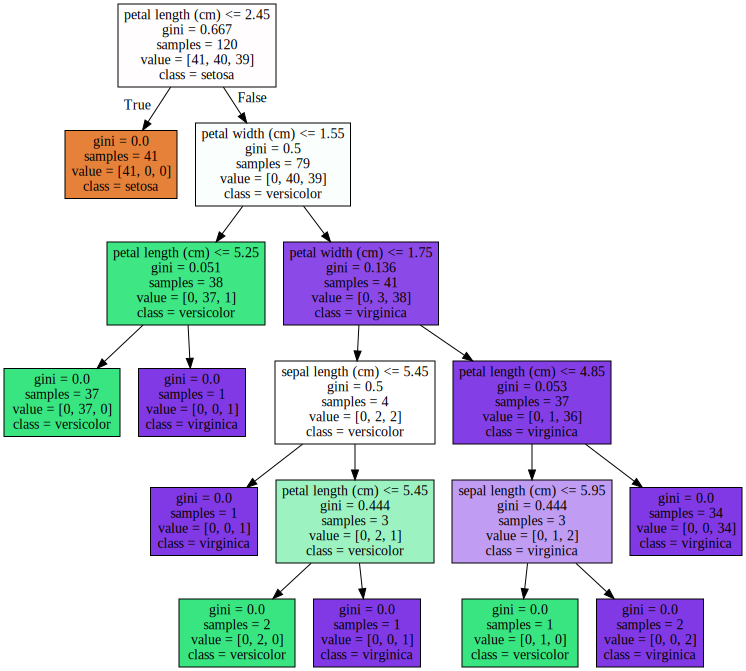

In [8]:
export_graphviz(
    dtc, out_file='tree2.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- min_samples_split = 4

In [9]:
dtc3 = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

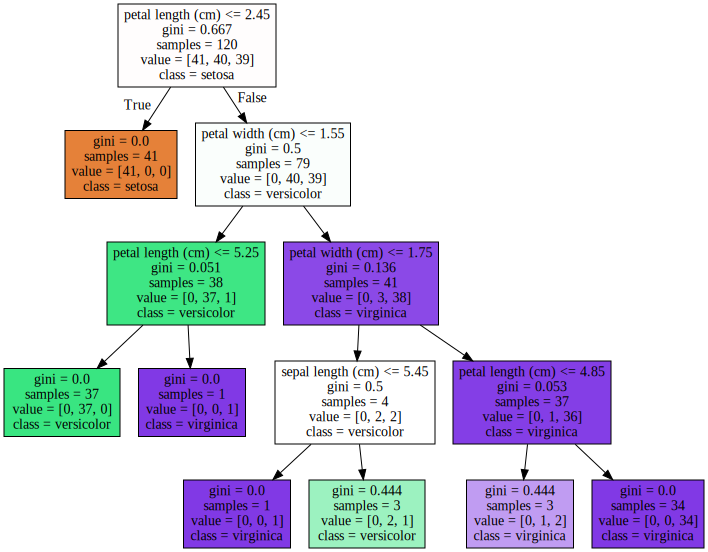

In [13]:
export_graphviz(
    dtc3, out_file='tree3.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=156)
dtc4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=156)

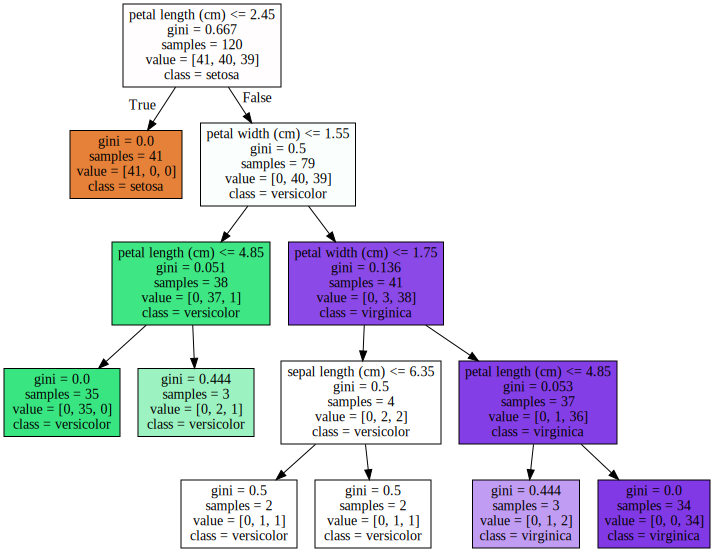

In [17]:
export_graphviz(
    dtc4, out_file='tree4.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)
with open('tree4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 학습된 모델이 제공하는 정보

- feature importance

In [18]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [19]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

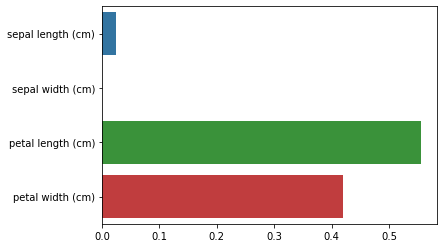

In [22]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()